# Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.

- Use merge_asof() to merge jpm (left table) and wells together on the date_time colu-mn, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
- Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
- Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=['', '_wells'], direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=['_jpm', '_bac'], direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

a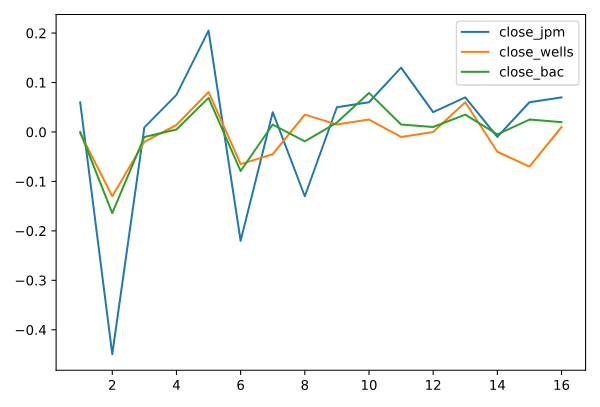

Fabulous! You can see that during this period, the price change for these bank stocks was roughly the same, although the price change for _JP Morgan_ was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.